In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, './modules')
from Data_prep import Data
from intersection_cols import get_data_intersection
from model_selector import model_container
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#define number of processors to use for parallel runs
num_procs = 4

#set verbose level for models
verbose_lvl = 0

#define input files
train_file = r'C:\Users\Admin\Desktop\Kaggle_Zillow Compitation\Raw Data\train_2016.csv'
properties_2016_file = r'C:\Users\Admin\Desktop\Kaggle_Zillow Compitation\Raw Data\properties_2016.csv'
test_file = r'C:\Users\Admin\Desktop\Kaggle_Zillow Compitation\Raw Data\train_2017.csv'
properties_2017_file = r'C:\Users\Admin\Desktop\Kaggle_Zillow Compitation\Raw Data\properties_2017.csv'


#define variables
cat_cols = ['hashottuborspa', 'propertycountylandusecode', 'fireplaceflag', 'taxdelinquencyflag']
num_cols = ['airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
        'propertylandusetypeid', 'regionidcity',
       'regionidcounty', 'roomcnt', 'storytypeid', 'threequarterbathnbr',
       'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'yearbuilt', 'numberofstories',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount',
       'taxdelinquencyyear']
date_col = ['transactiondate']
target_col = 'logerror'
id_col = 'parcelid'

In [3]:
data = Data(train_file, properties_2016_file, test_file, properties_2017_file , cat_cols, num_cols, date_col, target_col, id_col)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [4]:
new_data = get_data_intersection(data)
new_data.filter_cols()

In [5]:
models = model_container()

#create models -- hyperparameter tuning already done by hand for each model
models.add_model(LinearRegression())
models.add_model(RandomForestRegressor(n_estimators=500, n_jobs=num_procs, max_depth=22, min_samples_leaf=10, 
                                       max_features=0.7, verbose=verbose_lvl))
models.add_model(GradientBoostingRegressor(n_estimators=450,learning_rate=0.1, max_depth=3, loss='ls', min_samples_leaf=5,verbose=verbose_lvl))

In [6]:
models.cross_validate_score(data, k=2)
models.select_best_model()

In [7]:
models.fit_best_model(data.train_df[data.feature_cols], data.train_df[data.target_col])
models.predict_using_best_model(data.test_df[data.feature_cols])


Model Summaries:


 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) - MSE: 0.029076283895008798

 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=22, max_features=0.7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) - MSE: 0.026796928314528727

 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, m

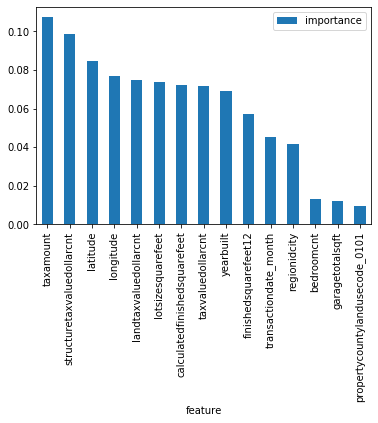

In [8]:
models.print_summary(data)